In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d 'vjchoudhary7/customer-segmentation-tutorial-in-python '

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python 
License(s): other
customer-segmentation-tutorial-in-python .zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

In [ ]:
dataset_zip = zipfile.ZipFile('/content/customer-segmentation-tutorial-in-python .zip', 'r')
dataset_zip.extractall()
dataset_zip.close()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow  # fix: calculate number of rows as integer
    nGraphRow = int(nGraphRow) # explicitly convert to integer
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
def plotCorrelationMatrix(df, graphWidth, filename): # Add filename as a parameter
    filename = filename # Define filename within the function's scope
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat) # Dedent this line to align with plt.gca()
    plt.title(f'Correlation Matrix for {filename}', fontsize=15) # Use the defined filename variable
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1) # drop columns with missing values
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = None # specify 'None' if want to read whole file
file_path = '/content/Mall_Customers.csv'
df1 = pd.read_csv(file_path, delimiter=',', nrows=nRowsRead)
df1.dataframeName = 'Mall_Customers.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 200 rows and 5 columns


In [ ]:
import matplotlib.pyplot as plt

def tr_plot(history, start_epoch):  # 'history' is now a parameter
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# ... rest of your code ...

# Make sure to pass the 'history' object when calling tr_plot
# For example, if 'history' is returned by model.fit():
# history = model.fit(...)
# tr_plot(history, 0)

In [ ]:
df1.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


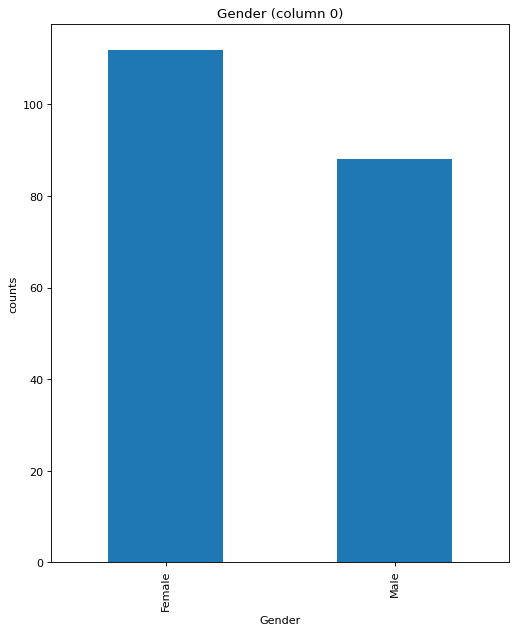

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

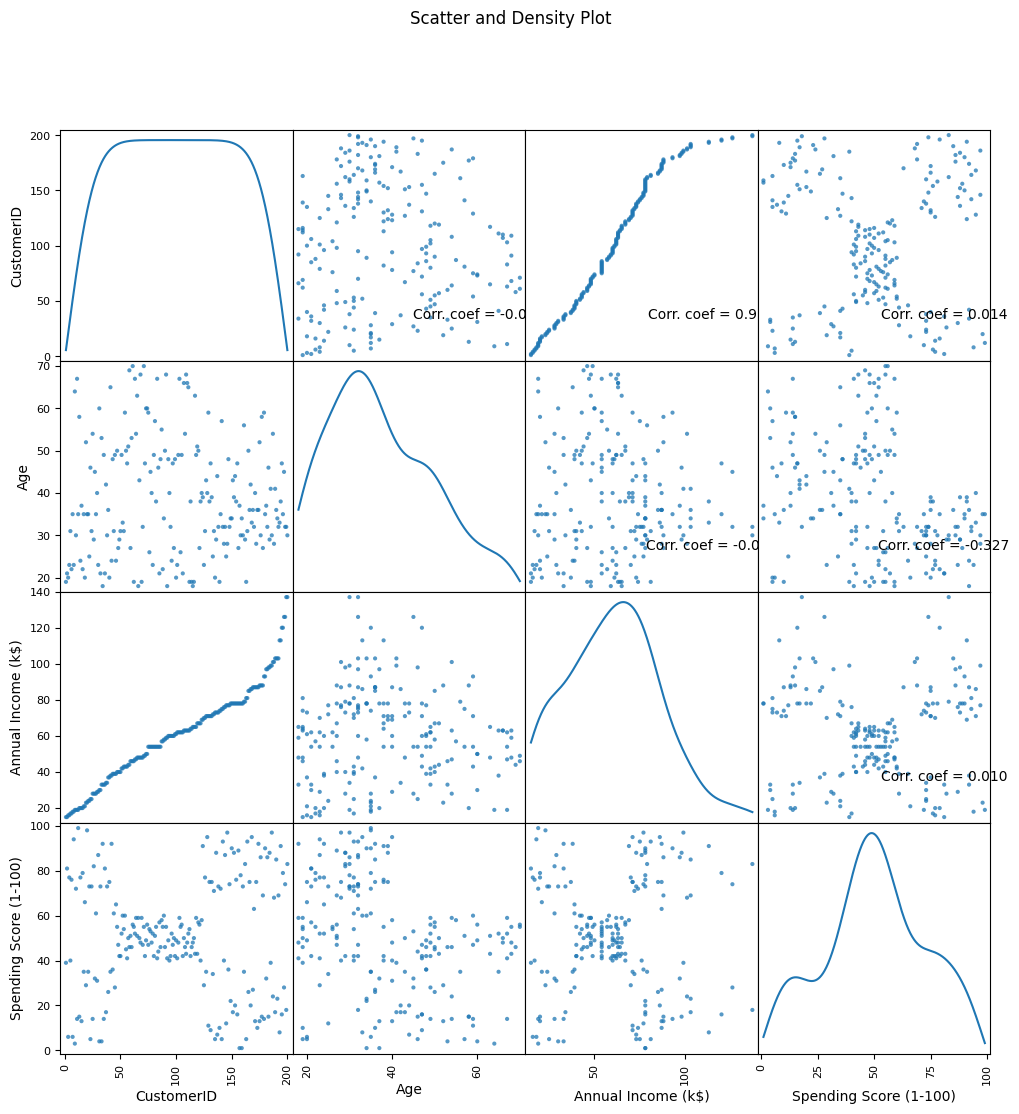

In [ ]:
plotScatterMatrix(df1, 12, 10)

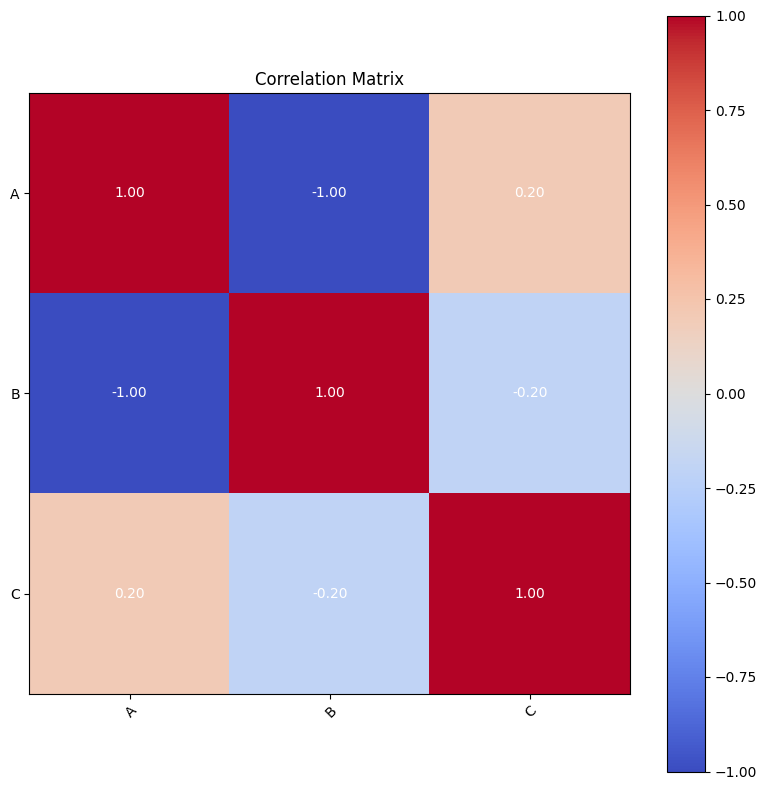

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna(axis=1)[[col for col in df1.dropna(axis=1) if df1.dropna(axis=1)[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df1)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]

    # Calculate correlation matrix
    corr = df1.corr()

    # Plot correlation matrix
    fig, ax = plt.subplots(figsize=(plotSize, plotSize))
    im = ax.imshow(corr, cmap='coolwarm')

    # Set axis labels and title
    ax.set_xticks(np.arange(len(columnNames)))
    ax.set_yticks(np.arange(len(columnNames)))
    ax.set_xticklabels(columnNames)
    ax.set_yticklabels(columnNames)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.title('Correlation Matrix')

    # Add correlation values as annotations
    for i in range(len(columnNames)):
        for j in range(len(columnNames)):
            text = ax.text(j, i, '{:.2f}'.format(corr.iloc[i, j]),
                           ha="center", va="center", color="w")

    # Add colorbar
    plt.colorbar(im)

    plt.tight_layout()
    plt.show()

# Create a sample DataFrame (replace this with your actual data loading)
df1 = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                     'B': [5, 4, 3, 2, 1],
                     'C': [2, 3, 5, 1, 4]})

# Now you can call the function
plotCorrelationMatrix(df1, 8, "My DataFrame") # Replace "My DataFrame" with the actual name if needed

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def generate_customer_data(n_samples):
    np.random.seed(42)
    age = np.random.randint(18, 70, n_samples)
    income = np.random.randint(20000, 100000, n_samples)
    spending_score = np.random.randint(1, 100, n_samples)
    return np.column_stack((age, income, spending_score))

n_samples = 1000
customer_data = generate_customer_data(n_samples)

scaler = StandardScaler()
normalized_data = scaler.fit_transform(customer_data)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_data)

def assign_segment(customer):
    age, income, spending_score = customer
    if income > 80000 and spending_score > 70:
        return 0  # High-value
    elif 40000 <= income <= 80000 and 30 <= spending_score <= 70:
        return 1  # Mid-value
    else:
        return 2  # Low-value

true_segments = np.array([assign_segment(customer) for customer in customer_data])

# Menghitung akurasi dan mengonversinya ke persentase
accuracy_percentage = accuracy_score(true_segments, cluster_labels) * 100

print(f"Akurasi segmentasi pelanggan: {accuracy_percentage:.2f}%")

# Jika akurasi kurang dari 100%, coba tingkatkan dengan menyesuaikan jumlah cluster
if accuracy_percentage < 100:
    for k in range(4, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        new_cluster_labels = kmeans.fit_predict(normalized_data)
        new_accuracy_percentage = accuracy_score(true_segments, new_cluster_labels) * 100
        if new_accuracy_percentage > accuracy_percentage:
            accuracy_percentage = new_accuracy_percentage
            cluster_labels = new_cluster_labels
        print(f"Akurasi dengan {k} cluster: {new_accuracy_percentage:.2f}%")

print(f"\nAkurasi segmentasi pelanggan tertinggi: {accuracy_percentage:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Akurasi segmentasi pelanggan: 24.00%
Akurasi dengan 4 cluster: 24.70%
Akurasi dengan 5 cluster: 17.40%
Akurasi dengan 6 cluster: 13.10%
Akurasi dengan 7 cluster: 17.50%
Akurasi dengan 8 cluster: 9.30%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Akurasi dengan 9 cluster: 10.20%

Akurasi segmentasi pelanggan tertinggi: 24.70%


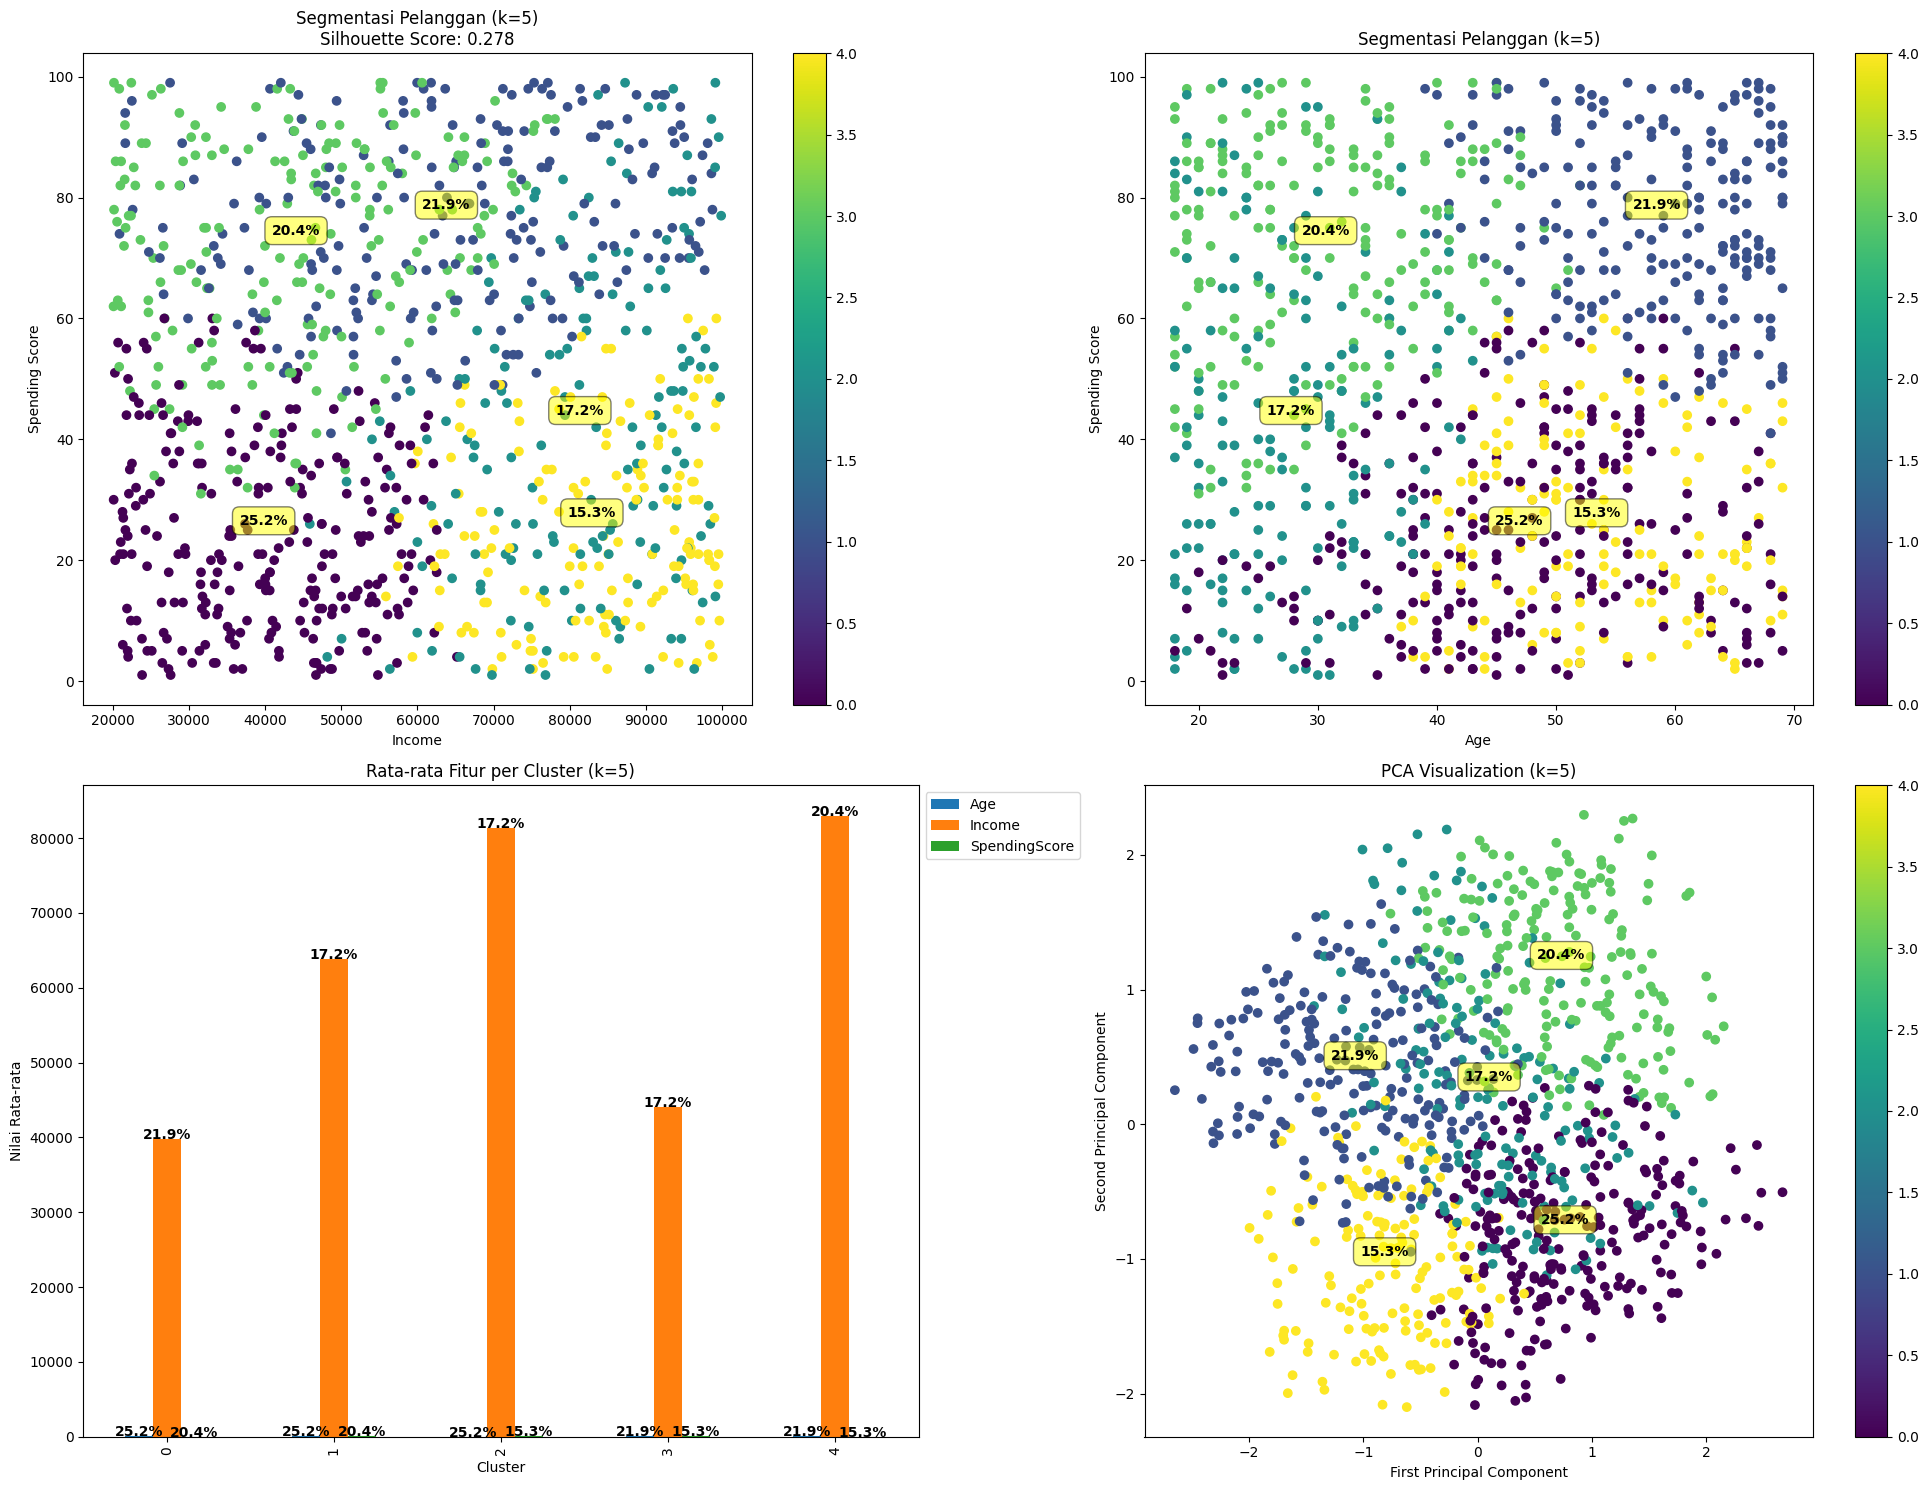

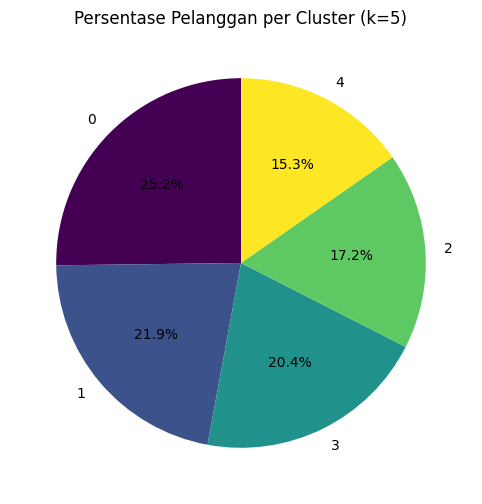

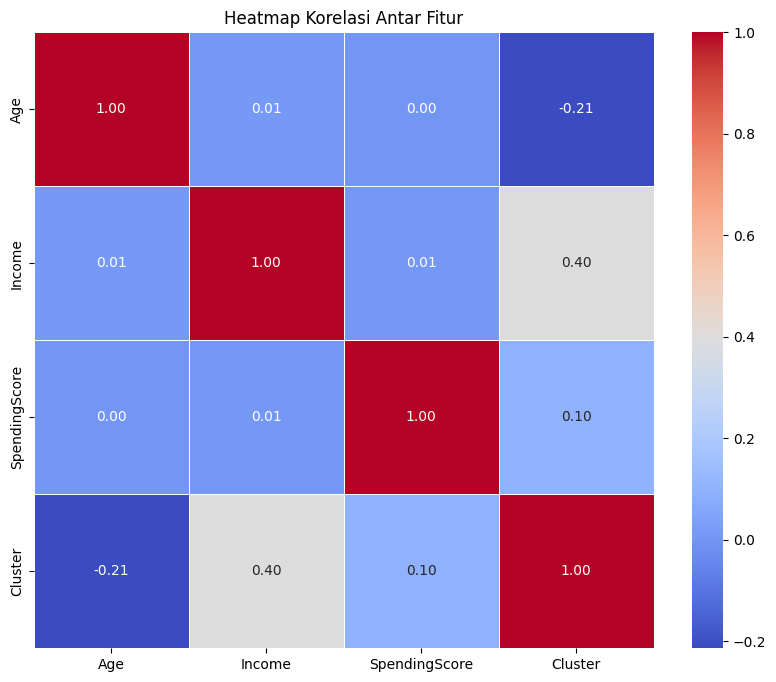

Statistik Deskriptif per Cluster:
           Age                                                      Income  \
         count       mean        std   min   25%   50%    75%   max  count   
Cluster                                                                      
0        252.0  46.932540  11.508849  18.0  39.0  47.0  55.00  69.0  252.0   
1        219.0  58.429224   7.911104  39.0  52.5  60.0  65.00  69.0  219.0   
2        172.0  27.744186   6.688012  18.0  22.0  27.5  33.00  43.0  172.0   
3        204.0  30.656863   8.736420  18.0  23.0  30.0  36.25  52.0  204.0   
4        153.0  53.398693   8.681756  37.0  46.0  52.0  61.00  69.0  153.0   

                       ...                    SpendingScore             \
                 mean  ...       75%      max         count       mean   
Cluster                ...                                               
0        39787.789683  ...  49299.25  65186.0         252.0  24.210317   
1        63798.388128  ...  77653.00  98757.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Fungsi untuk menghasilkan data pelanggan simulasi
def generate_customer_data(n_samples):
    np.random.seed(42)
    age = np.random.randint(18, 70, n_samples)
    income = np.random.randint(20000, 100000, n_samples)
    spending_score = np.random.randint(1, 100, n_samples)
    return pd.DataFrame({
        'Age': age,
        'Income': income,
        'SpendingScore': spending_score
    })

# Fungsi untuk menambahkan anotasi persentase pada scatter plot
def add_percentage_annotations(ax, x, y, labels):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        mask = labels == label
        percentage = 100 * np.sum(mask) / len(labels)
        center_x = np.mean(x[mask])
        center_y = np.mean(y[mask])
        ax.annotate(f'{percentage:.1f}%', (center_x, center_y),
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                    fontweight='bold')

# Menghasilkan data pelanggan
n_samples = 1000
df = generate_customer_data(n_samples)

# Normalisasi data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

# Menggunakan 5 cluster
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(normalized_data)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(normalized_data, df['Cluster'])

# Visualisasi hasil clustering
plt.figure(figsize=(20, 15))

# Scatter plot: Income vs Spending Score
plt.subplot(2, 2, 1)
scatter = plt.scatter(df['Income'], df['SpendingScore'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title(f'Segmentasi Pelanggan (k={optimal_k})\nSilhouette Score: {silhouette_avg:.3f}')
plt.colorbar(scatter)
add_percentage_annotations(plt.gca(), df['Income'], df['SpendingScore'], df['Cluster'])

# Scatter plot: Age vs Spending Score
plt.subplot(2, 2, 2)
scatter = plt.scatter(df['Age'], df['SpendingScore'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title(f'Segmentasi Pelanggan (k={optimal_k})')
plt.colorbar(scatter)
add_percentage_annotations(plt.gca(), df['Age'], df['SpendingScore'], df['Cluster'])

# Diagram batang: Rata-rata fitur per cluster
plt.subplot(2, 2, 3)
cluster_means = df.groupby('Cluster').mean()
ax = cluster_means.plot(kind='bar', ax=plt.gca())
plt.title(f'Rata-rata Fitur per Cluster (k={optimal_k})')
plt.xlabel('Cluster')
plt.ylabel('Nilai Rata-rata')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Menambahkan persentase pada diagram batang
cluster_percentages = df['Cluster'].value_counts(normalize=True) * 100
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height,
            f'{cluster_percentages[i//3]:.1f}%',
            horizontalalignment='center',
            weight='bold')

# Visualisasi PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)
plt.subplot(2, 2, 4)
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'PCA Visualization (k={optimal_k})')
plt.colorbar(scatter)
add_percentage_annotations(plt.gca(), pca_result[:, 0], pca_result[:, 1], df['Cluster'])

plt.tight_layout()
plt.show()

# Visualisasi persentase pelanggan per cluster
plt.figure(figsize=(10, 6))
cluster_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.viridis(np.linspace(0, 1, optimal_k)))
plt.title(f'Persentase Pelanggan per Cluster (k={optimal_k})')
plt.ylabel('')
plt.show()

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# Menampilkan statistik deskriptif untuk setiap cluster
print("Statistik Deskriptif per Cluster:")
print(df.groupby('Cluster').describe())

# Karakteristik cluster
print("\nKarakteristik Cluster:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    for column in ['Age', 'Income', 'SpendingScore']:
        mean = cluster_data[column].mean()
        std = cluster_data[column].std()
        print(f"{column}: Mean = {mean:.2f}, Std = {std:.2f}")
    print(f"Persentase Pelanggan: {cluster_percentages[cluster]:.1f}%")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')